In [1]:
import pandas as pd
import matplotlib.pylab as plt
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage 

In [2]:
ds=pd.read_csv(r"C:\Users\arunf\OneDrive\Documents\Data Science\Machine Learning\DataSet\diabetes (3) (2).csv")

In [3]:
ds

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
ds.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
def norm_func(i):
    x=(i-i.mean()/i.std())
    return (x)

In [6]:
ds_norm=norm_func(ds.iloc[:,:8])

In [7]:
ds_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,4.858892,144.21881,68.429729,33.712627,-0.692439,29.542171,-0.797194,47.17345
1,-0.141108,81.21881,62.429729,27.712627,-0.692439,22.542171,-1.073194,28.17345
2,6.858892,179.21881,60.429729,-1.287373,-0.692439,19.242171,-0.752194,29.17345
3,-0.141108,85.21881,62.429729,21.712627,93.307561,24.042171,-1.257194,18.17345
4,-1.141108,133.21881,36.429729,33.712627,167.307561,39.042171,0.863806,30.17345
...,...,...,...,...,...,...,...,...
763,8.858892,97.21881,72.429729,46.712627,179.307561,28.842171,-1.253194,60.17345
764,0.858892,118.21881,66.429729,25.712627,-0.692439,32.742171,-1.084194,24.17345
765,3.858892,117.21881,68.429729,21.712627,111.307561,22.142171,-1.179194,27.17345
766,-0.141108,122.21881,56.429729,-1.287373,-0.692439,26.042171,-1.075194,44.17345


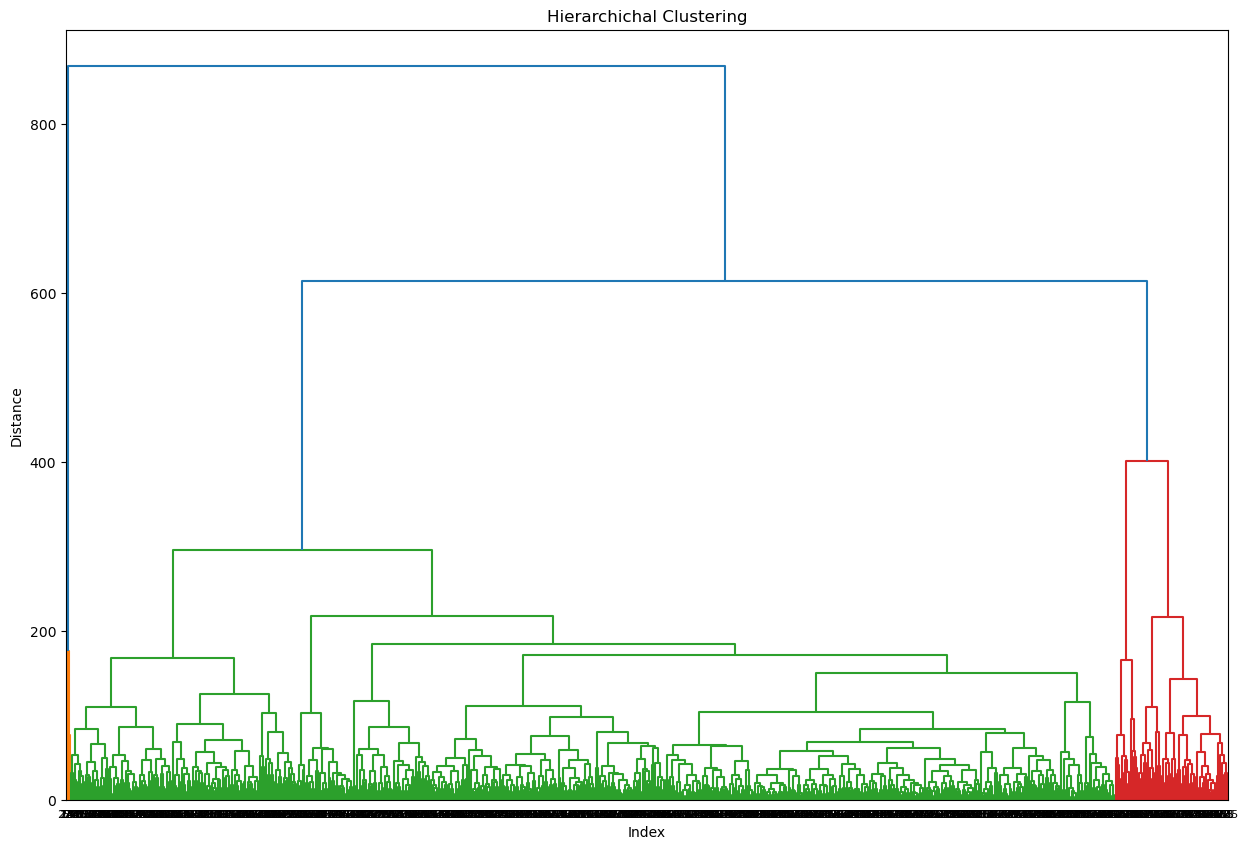

In [8]:
z=linkage(ds_norm,method='complete',metric='euclidean')
plt.figure(figsize=(15,10));plt.title("Hierarchichal Clustering");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering as ac
h_complete=ac(n_clusters=3,linkage='complete',affinity='euclidean').fit(ds_norm)

In [10]:
h_complete.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,

In [12]:
cluster_label=pd.Series(h_complete.labels_)

In [13]:
cluster_label

0      2
1      2
2      2
3      2
4      2
      ..
763    2
764    2
765    2
766    2
767    2
Length: 768, dtype: int64

In [14]:
ds['cluster']=cluster_label
ds=ds.iloc[:,[9,8,0,1,2,3,4,5,6,7]]
ds

,cluster,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,1,6,148,72,35,0,33.6,0.627,50
1,2,0,1,85,66,29,0,26.6,0.351,31
2,2,1,8,183,64,0,0,23.3,0.672,32
3,2,0,1,89,66,23,94,28.1,0.167,21
4,2,1,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...,...,...
763,2,0,10,101,76,48,180,32.9,0.171,63
764,2,0,2,122,70,27,0,36.8,0.340,27
765,2,0,5,121,72,23,112,26.2,0.245,30
766,2,1,1,126,60,0,0,30.1,0.349,47


In [15]:
ds.groupby(ds.cluster).mean()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
cluster,,,,,,,,,
0,0.506667,3.693333,148.346667,74.160000,32.226667,325.600000,35.685333,0.562413,33.000000
1,0.333333,1.666667,183.666667,73.333333,31.666667,756.666667,39.700000,1.051333,37.666667
2,0.331884,3.871014,117.637681,68.537681,19.217391,50.139130,31.557681,0.459516,33.247826
